# Tensorflow CNN for MNIST

Using TensorFlow backend.


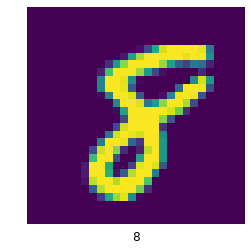

In [1]:
%matplotlib inline
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
tf.logging.set_verbosity(tf.logging.ERROR)  

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


imageIndex = 777
plt.imshow(x_train[imageIndex])
plt.title(y_train[imageIndex], y=-0.1)
plt.axis("off")
plt.show()

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
inputShape = (28, 28, 1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255
x_test /= 255

print("X Train shape: {}".format(x_train.shape))
print("Number of images in x_train: {}, number of images in x_test: {}".format(x_train.shape[0], x_test.shape[0]))

X Train shape: (60000, 28, 28, 1)
Number of images in x_train: 60000, number of images in x_test: 10000


# Make model

In [4]:
import warnings
warnings.filterwarnings('ignore')

# CNN With 1 Conv layer and 1 max pool layer
model = Sequential()
model.add(Conv2D(28, kernel_size = (3,3), input_shape=inputShape))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully connected neural network
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 25s 409us/step - loss: 0.2051 - acc: 0.9380
Epoch 2/10
60000/60000 [==============================] - 26s 427us/step - loss: 0.0846 - acc: 0.9739
Epoch 3/10
60000/60000 [==============================] - 24s 397us/step - loss: 0.0573 - acc: 0.9819
Epoch 4/10
60000/60000 [==============================] - 28s 459us/step - loss: 0.0455 - acc: 0.9853
Epoch 5/10
60000/60000 [==============================] - 27s 453us/step - loss: 0.0345 - acc: 0.9887
Epoch 6/10
60000/60000 [==============================] - 24s 392us/step - loss: 0.0279 - acc: 0.9909
Epoch 7/10
60000/60000 [==============================] - 24s 400us/step - loss: 0.0248 - acc: 0.9917
Epoch 8/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.0214 - acc: 0.9929
Epoch 9/10
60000/60000 [==============================] - 24s 399us/step - loss: 0.0195 - acc: 0.9933
Epoch 10/10
60000/60000 [==============================] - 24s 399us/step - loss: 

In [13]:
"Loss: {0[0]}, accuracy: {0[1]}".format(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 2s 156us/step


'Loss: 0.06114918912611029, accuracy: 0.9847'